<a href="https://colab.research.google.com/github/Ashu10051998/Face-Emotion-Detection/blob/main/Face_Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
url= 'https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split


In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
import tensorflow as tf
from pathlib import Path

tf.random.set_seed(4)

In [7]:
picture_size = 64
folder_path = "/content/drive/MyDrive/Data/archive.zip (Unzipped Files)/"

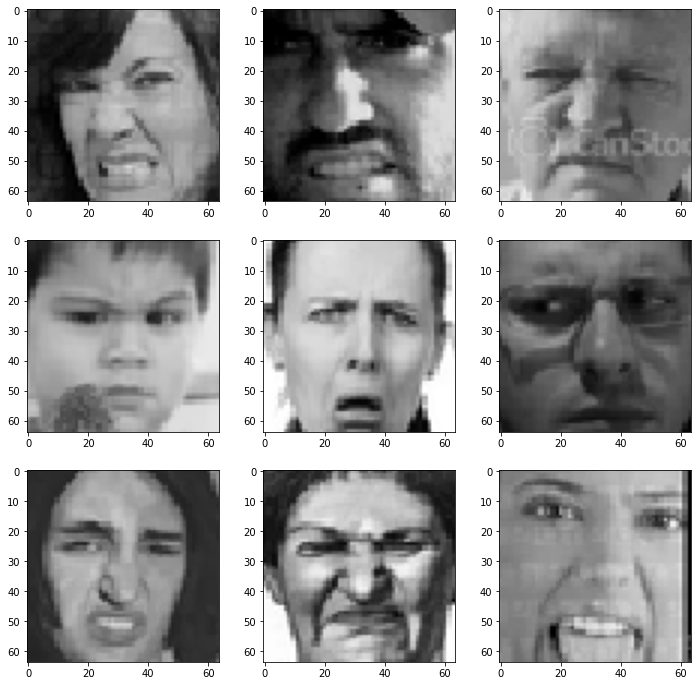

In [8]:
expression = 'disgusted'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [9]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [10]:
tf.__version__

'2.6.0'

In [11]:
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

In [12]:
batch_size=64

In [13]:
training_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 25107 images belonging to 7 classes.


In [14]:
test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [15]:
cnn=tf.keras.models.Sequential()

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dense(units=7,activation='softmax'))

In [23]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x=training_set,validation_data = test_set,epochs=15)

Epoch 1/15
393/393 [==============================] - 2883s 7s/step - loss: 0.5255 - accuracy: 0.3151 - val_loss: 0.3807 - val_accuracy: 0.3201
Epoch 2/15
393/393 [==============================] - 2386s 6s/step - loss: 0.3454 - accuracy: 0.3923 - val_loss: 0.3575 - val_accuracy: 0.3516
Epoch 3/15
393/393 [==============================] - 2380s 6s/step - loss: 0.3258 - accuracy: 0.4350 - val_loss: 0.3356 - val_accuracy: 0.4069
Epoch 4/15
393/393 [==============================] - 2380s 6s/step - loss: 0.3129 - accuracy: 0.4619 - val_loss: 0.3279 - val_accuracy: 0.4294
Epoch 5/15
393/393 [==============================] - 2382s 6s/step - loss: 0.3044 - accuracy: 0.4825 - val_loss: 0.3182 - val_accuracy: 0.4458
Epoch 6/15
393/393 [==============================] - 2382s 6s/step - loss: 0.2922 - accuracy: 0.5074 - val_loss: 0.3201 - val_accuracy: 0.4508
Epoch 7/15
393/393 [==============================] - 2383s 6s/step - loss: 0.2835 - accuracy: 0.5234 - val_loss: 0.3154 - val_accuracy: